In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import os 
from linalgo.client import LinalgoClient

Populating the interactive namespace from numpy and matplotlib


In [2]:
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')
linalgo_client = LinalgoClient(client_id, client_secret)

In [46]:
tasks = linalgo_client.get_tasks()
for task in tasks:
    print(f"id: {task.id}, name: {task.name}")

id: 22, name: WRT3 Text 3 Class 3R2 (all)
id: 14, name: WRT3 Text 1 Class 3R1_Xiuqi & Denise & Clare
id: 23, name: WRT3 Text 2 Class 3R3_Christin & Xiuqi
id: 17, name: WRT3 TEXT4 3R4_WINNIE&JO&SHYAM
id: 16, name: WRT3 Text 5 Class 3R5_Xiuqi & Denise & Clare
id: 18, name: WRT3 TEXT6 3R6_WINNIE&JO&SHYAM
id: 29, name: WRT3 Text 7 Class 3R7_Xiuqi & Clare
id: 46, name: Rob v1 - Review


In [69]:
entities = task.entities
for entity in entities:
    print(f"id: {entity['id']}, name: {entity['title']}")

id: 4, name: CT Ideate
id: 5, name: CT Justify
id: 6, name: CT Validate
id: 7, name: CT Challenge
id: 8, name: CT Clarify
id: 9, name: CT Synthesis
id: 10, name: CT Elaboration


In [99]:
label = 5
data, target = [], []
for task in tasks[:-1]:
    docs, labels = task.transform(target='binary',  label=label)
    data.extend(docs)
    target.extend(labels)

In [100]:
print(f"number of docs: {len(data)}")

number of docs: 1220


In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [102]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

text_clf.fit(X_train, y_train)
y_score = text_clf.decision_function(X_test)

In [103]:
from sklearn.metrics import roc_curve, auc

In [104]:
fpr, tpr, thres = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

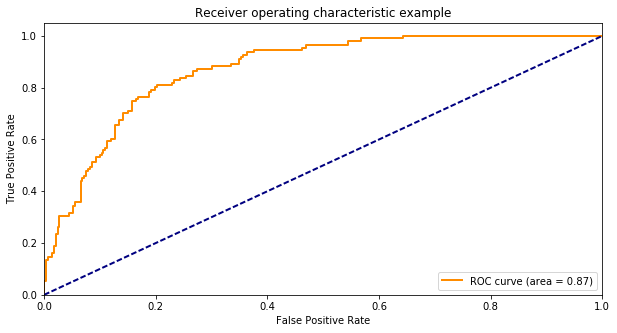

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [106]:
from linalgo.annotate import Annotator

In [107]:
task = linalgo_client.get_task(46)
print(f"# docs: {len(task.documents)}")

# docs: 2064


In [108]:
annotator = Annotator(name='rob v1', model=text_clf, annotation_type_id=label, threshold=0)
annotator.assign_task(task)

In [109]:
for doc in documents:
    annotation = annotator._get_annotation(doc)
    if annotation is not None:
        print('----')
        print(doc.content)
        print(annotation)
        print()

-0.701850072849
-1.21163182608
-0.44324941433
-0.907197625874
-0.362739706661
-2.52484604117
-0.856398981665
-1.53304410382
-0.265795535453
-0.841149555132
-1.54052962361
-0.535346077723
-2.36860714634
-0.874847529131
-0.792377529291
-2.30067786356
-0.581734612496
-2.31546951089
-0.659470775214
-2.0561676646
-0.666880199715
-2.97204237627
-1.48024138521
-1.40394254812
-1.02269190353
-2.7850371913
-1.15062334219
-1.34506736041
-0.584046243652
-2.20837588109
-0.342001710158
-1.31646404241
-0.8993618765
-1.92248459477
-0.943087290264
-0.793106053642
-1.99286667413
-1.67085495566
-2.12726730365
-0.339409940045
-0.517809407642
-2.49385323518
-1.35207638166
-1.32548404581
-1.34134436714
-1.98881427597
-1.04681853116
-1.09002490774
-0.315911172713
-1.54633457436
-0.673019002108
-1.12585943291
-2.31171137301
-0.768689436858
-1.88519703027
-1.12048976824
-1.90194701338
-0.558235814069
-2.61237901325
-0.840058947768
-1.95635036386
-1.6585418092
-1.77193583204
-1.33249205777
-0.409723063476
-1.94

-0.19714296216
-1.4134994803
-1.20998961989
-0.352720438422
0.13949696471
----
In a nutshell, I feel that babies should not be aborted and not allowed into this world on the first reaction just because they have disabilities, but their parents should really give a deep thought and consider all the consequences and the fairness to their newborn before thinking of abortion.
5

-0.0695097764423
-1.79934754249
-0.755565976315
-0.435438944317
-0.124217180073
-2.1429040946
0.443054727941
----
The main idea being conveyed here is that no one should think of an abortion as an immediate resolution to finding out that they are pregnant or that the child that they will be having will have birth defects.
I share the author's view on this topic as abortion is not a bad thing per se ,however, if someone finds out that they're pregnant or that the foetus is not normal and the first thing that comes to mind is getting rid of it without thinking about it,it would be a problem.
5

-2.08170120749
0.21912

-0.648651020116
-0.378378297761
-2.08385548087
-1.57585895412
-0.165303474698
-1.33915126021
-0.155952205187
-0.647978049017
-1.09129015347
-0.658721707856
-0.978118191059
-0.428258123749
-1.19231649286
-0.788489554891
-1.47974518711
-0.902415936138
-0.429623609041
-0.941928967146
-0.247580929792
-0.283412224195
-0.542493753963
-1.18319564057
-0.67055411056
-1.64871161755
-0.703072458719
-1.09129015347
-3.04363735685
-1.25854307281
-1.28715685171
-1.5513966788
-1.86514409282
0.0814521608281
----
I believe that the text's main purpose is to show that there are people who possess kindness. Mason Wartman was willing to give up his job as an equity researcher ( a high paying job) and set up a pizza shop, where he sells pizza for a very low price of a dollar. More importantly, patrons are allowed to pay for a slice of pizza for future patrons. Homeless people gets to have a meal because of this policy he has established in his restaurant.
5

-1.39644504737
-0.87150792716
-2.07640330045
-1.9

-0.397206980848
-1.14915347626
-2.35935407331
-1.26634259305
-0.995981095563
-0.437057404293
-0.956190783293
-2.25642181402
-1.3386799232
-1.3177462317
-0.12574982907
-0.251089745627
-1.83879844844
0.088432264884
----
I would consider doing what Mason have done, only if I can support myself and my family. If i do not have sufficient funds, I will not be able to live in a poor situation while coping with the shop. I believe that there are definitely many people living in poverty around the world and are less fortunate than me. If i have sufficient funds, I'll not quit my job but ask other people that are willing to volunteer at the shop. This way I can ensure to have a constant income to support my family.
5

0.814952557951
----
The author wanted to encourage others to help those in need like how customers "pay it forward " in this Pizza Shop which helps " feeds 40 homeless a day " . I agree with the author because I believe we should spread awareness that there are others who are not a

This Song has also become popular worldwide that many people knows how to sing. This shows that MUSIC can be a common language that unites people of the world
5

-1.90686395915
0.208155815387
----
There are many songs in different places that bond and bind people together. Songs such We are the World Haiti or even world cup songs such as Waka Waka it may be singed in English but it makes people to be singed in worldwide as they have a common interest with is soccer. Therefore i believe that music is a common language 
:)
5

-0.568233466491
-1.99970830811
-0.728459701621
-0.607205664386
-1.40529490743
-0.486890309684
-2.05302902377
-1.27802450759
-1.61351775666
-1.98133062783
-1.08994785032
-1.26165389857
-1.05283487169
-1.70346702231
-0.663141619379
-1.50900691818
-0.414685320412
-0.476071552597
-1.23896211695
-1.52245176394
-2.08516788025
-0.444696768182
-2.18525217812
-0.521640649017
-0.488475477137
-1.32889510038
-0.446676968528
-0.856614661396
-1.10786155825
-1.65464763423
-1.07303

-1.47276480248
-0.785375539351
-1.38798653428
-1.05797903648
-0.113006876571
-0.860214664394
0.258777774611
----
Yes I do agree that most jobs still require merits , but I feel that the workforce does not seem to acknowledge those that learn from experience and take the initiative. These can be seen from several aspects, such as those that are experts in their field because they went to the library and read books about that field, and not because they went to a prestigious university. So the merit requirement is slightly restrictive to those that worked hard on their own and took the initiative.
5

0.115562742821
----
In my opinion, I think that Singapore not only clearly emphasises on the importance of exams, such as the GCE O and A-level examinations which are held annually without fail, but also in our holistic development. This can be seen by the CCE lessons that schools need to teach, in order to input morals in students and develop their character. Albeit, in Singapore we are mos

-1.03035762889
-1.12216369859
-1.06653855783
-1.72548117936
-1.66418582352
-1.18240485794
-2.05287113455
-1.96966391122
-1.66060766767
-1.35120702629
-1.54826171668
-0.752379879795
-1.53001619747
-1.64764084349
0.1607292378
----
If you knew that it was unreliable then why did you use it? I quoted texts from dysfunctionalliteracy.com and Tor.com as they were written by only one author each and I believe that they would not post false information as their reputation as authors and the reputation of their websites as a whole would crumble if they posted false information. Thus I believe that my sources are pretty credible.
5

-0.249052173206
-1.62982171607
-1.44074047901
-1.225927995
-0.913388978996
-0.105469772642
-1.19276705809
0.266812311051
----
I would  like to know how writer's block can be cured by the individual for some people as it is stated "or because the symptoms are resolved without outside assistance.", the author has not included this in the article and I believe I would b